In [1]:
import tensorflow as tf
import numpy
import numpy.random as rng
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## parameters

In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

## training data

In [3]:

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

## input

In [4]:
X = tf.placeholder('float')
Y = tf.placeholder('float')
W = tf.Variable(rng.randn(),name='weight')
b = tf.Variable(rng.randn(),name='bias')

## Model

In [5]:
pred = tf.add(tf.multiply(X,W),b)

###  MSE

In [8]:
cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Initialize the Variables

In [9]:
init = tf.global_variables_initializer()

## Start training

Epoch: 0050 cost= 0.320173681 W= 0.5252217 b= -1.1813823
Epoch: 0100 cost= 0.292084932 W= 0.50882906 b= -1.0634551
Epoch: 0150 cost= 0.267238736 W= 0.49341112 b= -0.95253915
Epoch: 0200 cost= 0.245261356 W= 0.47891003 b= -0.84821975
Epoch: 0250 cost= 0.225821719 W= 0.4652715 b= -0.750105
Epoch: 0300 cost= 0.208626941 W= 0.4524442 b= -0.65782636
Epoch: 0350 cost= 0.193417534 W= 0.44037974 b= -0.5710352
Epoch: 0400 cost= 0.179964617 W= 0.4290327 b= -0.4894064
Epoch: 0450 cost= 0.168065235 W= 0.41836068 b= -0.41263232
Epoch: 0500 cost= 0.157540023 W= 0.4083233 b= -0.34042403
Epoch: 0550 cost= 0.148230404 W= 0.39888293 b= -0.27251035
Epoch: 0600 cost= 0.139996022 W= 0.39000395 b= -0.20863579
Epoch: 0650 cost= 0.132712722 W= 0.3816531 b= -0.1485603
Epoch: 0700 cost= 0.126270697 W= 0.373799 b= -0.09205783
Epoch: 0750 cost= 0.120572850 W= 0.36641183 b= -0.03891571
Epoch: 0800 cost= 0.115533188 W= 0.35946405 b= 0.011065847
Epoch: 0850 cost= 0.111075744 W= 0.35292956 b= 0.058074757
Epoch: 0900 

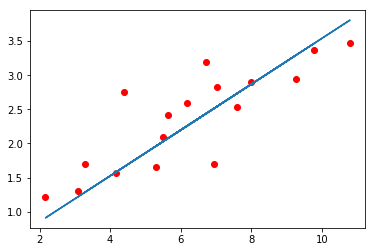

In [10]:
with tf.Session() as sess:
    sess.run(init)
    
    #Fit training data
    for epoch in range(training_epochs):
        for x,y in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print('Epoch:','%04d'%(epoch+1),'cost=','{:.9f}'.format(c),'W=',sess.run(W),'b=',sess.run(b))
    print('Optimization Finished!')
    training_cost = sess.run(cost,feed_dict={X:train_X,Y:train_Y})
    print('Training cost=',training_cost,'W=',sess.run(W),'b=',sess.run(b),'\n')
    
    #Graphic display
    plt.plot(train_X,train_Y,'ro',label='Original data')
    plt.plot(train_X,sess.run(W) * train_X + sess.run(b),label='Fitted line')
    plt.show()